In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from datetime import datetime
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 70) #view 70 columns

<hr style="border:1px solid gray"> </hr>

## EDA

#### Load clean data

In [3]:
df = pd.read_csv('data/clean_data.csv').iloc[:, 1:]

In [4]:
df.head()

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,lat_long,quadrant,nrth_sth,age,month,yr_quarter
0,2014-10-13,7129300520,221900.0,3,1.00,1180,5650,0.0,0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,0,0,three,half_two,average,"(47.5112, -122.257)",NW,N,66,10,4
1,2014-12-09,6414100192,538000.0,3,2.25,2570,7242,0.0,0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,1,1,three,two_two_point_five,average,"(47.721000000000004, -122.319)",NW,N,70,12,4
2,2015-02-25,5631500400,180000.0,2,1.00,770,10000,0.0,0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,0,one_two,half_two,below_average,"(47.7379, -122.23299999999999)",NW,N,88,2,1
3,2014-12-09,2487200875,604000.0,4,3.00,1960,5000,0.0,0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,1,0,four,many,average,"(47.5208, -122.39299999999999)",NW,N,56,12,4
4,2015-02-18,1954400510,510000.0,3,2.00,1680,8080,0.0,0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,three,half_two,good,"(47.6168, -122.045)",NE,N,34,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21417 non-null  object 
 1   id             21417 non-null  int64  
 2   price          21417 non-null  float64
 3   bedrooms       21417 non-null  int64  
 4   bathrooms      21417 non-null  float64
 5   sqft_living    21417 non-null  int64  
 6   sqft_lot       21417 non-null  int64  
 7   waterfront     21417 non-null  float64
 8   view           21417 non-null  int64  
 9   condition      21417 non-null  int64  
 10  grade          21417 non-null  int64  
 11  sqft_above     21417 non-null  int64  
 12  zipcode        21417 non-null  int64  
 13  lat            21417 non-null  float64
 14  long           21417 non-null  float64
 15  sqft_living15  21417 non-null  int64  
 16  sqft_lot15     21417 non-null  int64  
 17  renovated      21417 non-null  int64  
 18  baseme

#### Explore target variable (price)
Non-normality in price may hurt correlations with the features so addressing outliers may help, which will hurt assumption checks (like linearity and homoscedasticity) later.

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
325000.0    146
400000.0    144
Name: price, dtype: int64

<AxesSubplot:>

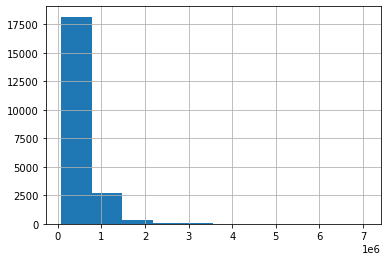

In [6]:
display(df['price'].value_counts().head(7))
df['price'].hist()

<AxesSubplot:xlabel='price'>

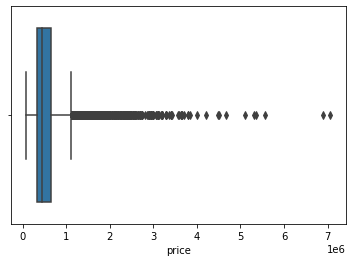

In [7]:
sns.boxplot(x = df['price'])

In [8]:
#Finding a cutoff point
for i in range(85, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.85 percentile: 780000.0
0.86 percentile: 799803.9999999993
0.87 percentile: 815000.0
0.88 percentile: 838448.000000001
0.89 percentile: 860000.0
0.9 percentile: 889000.0
0.91 percentile: 920000.0
0.92 percentile: 950696.9600000011
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1968400.0000000014


In [9]:
len(df[df['price'] > 1.45e6])

561

In [10]:
df_no_y_outlrs = df[df['price'] < 1.45e6]
df_no_y_outlrs['price'].max()

1440000.0

<AxesSubplot:>

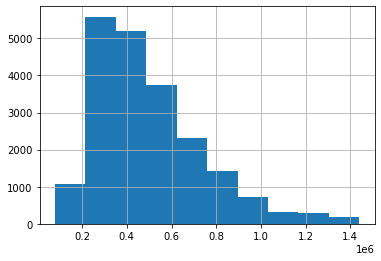

In [11]:
df_no_y_outlrs['price'].hist()

<AxesSubplot:xlabel='price'>

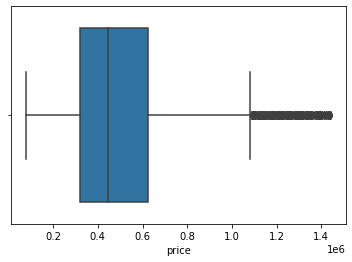

In [12]:
sns.boxplot(x = df_no_y_outlrs['price'])

#### Create sectors

In [13]:
# plt.figure(figsize = (10,10))
# sns.scatterplot(x='long',y='lat',hue='price',data=df_no_y_outlrs)
# plt.title('Lat vs Long, Price with Color');

Done in the data cleaning section. Used above chart to determine sections

#### Split continuous and categorical variables

In [14]:
def cats_and_conts(df):
    conts = []
    cats = []
    for col in df.columns:
        if df[col].nunique() < 20:
            cats.append(col)
        else:
            conts.append(col)
    return df[cats], df[conts]
df_cats, df_conts = cats_and_conts(df_no_y_outlrs)
print('DF with sqft (cats/conts):\n', df_cats.columns, '\n', df_conts.columns)

DF with sqft (cats/conts):
 Index(['bedrooms', 'waterfront', 'view', 'condition', 'grade', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'quadrant', 'nrth_sth', 'month', 'yr_quarter'],
      dtype='object') 
 Index(['date', 'id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'lat_long', 'age'],
      dtype='object')


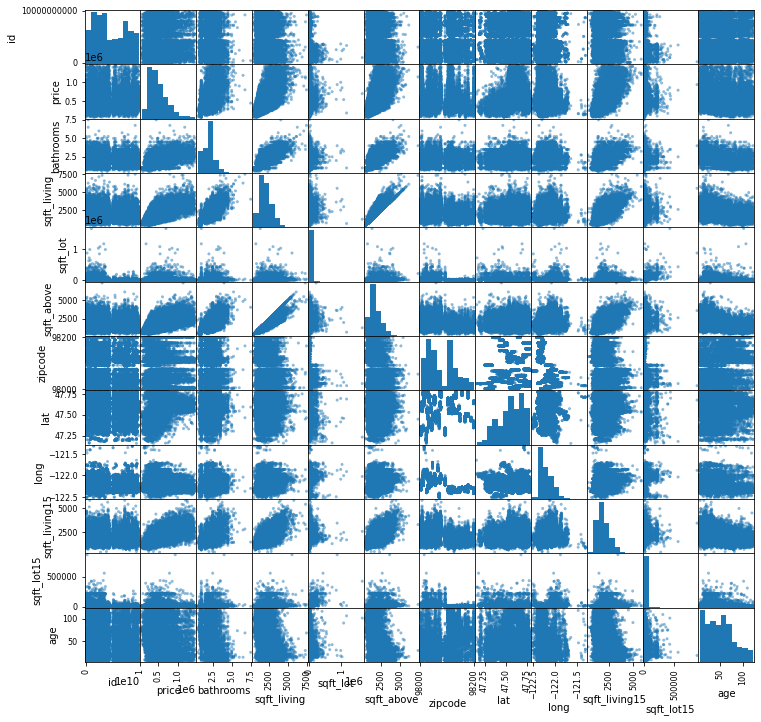

In [15]:
pd.plotting.scatter_matrix(df_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Transform continuous variables and load into new dataframe

In [16]:
df_no_y_outlrs.columns

Index(['date', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'lat_long', 'quadrant', 'nrth_sth', 'age', 'month', 'yr_quarter'],
      dtype='object')

In [17]:
df_log = df_no_y_outlrs[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','grade','sqft_living15','age', 'sqft_above', 'sqft_lot15']].copy()
df_log.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_living15,age,sqft_above,sqft_lot15
0,221900.0,3,1.00,1180,5650,7,1340,66,1180,5650
1,538000.0,3,2.25,2570,7242,7,1690,70,2170,7639
2,180000.0,2,1.00,770,10000,6,2720,88,770,8062


In [18]:
for col in df_log.columns:
    df_log[col] = df_log[col].map(lambda x: np.log(x))
    df_log.rename(columns = {col: 'log_'+col}, inplace=True)
df_log.head(3)

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_grade,log_sqft_living15,log_age,log_sqft_above,log_sqft_lot15
0,12.309982,1.098612,0.00000,7.073270,8.639411,1.945910,7.200425,4.189655,7.073270,8.639411
1,13.195614,1.098612,0.81093,7.851661,8.887653,1.945910,7.432484,4.248495,7.682482,8.941022
2,12.100712,0.693147,0.00000,6.646391,9.210340,1.791759,7.908387,4.477337,6.646391,8.994917


In [19]:
print(df_log.columns)
print(df_cats.columns)

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'log_grade', 'log_sqft_living15', 'log_age',
       'log_sqft_above', 'log_sqft_lot15'],
      dtype='object')
Index(['bedrooms', 'waterfront', 'view', 'condition', 'grade', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'quadrant', 'nrth_sth', 'month', 'yr_quarter'],
      dtype='object')


In [20]:
df_log_w_cat = pd.concat([df_log,
                df_no_y_outlrs[['waterfront', 'view', 'condition', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'month', 'quadrant', 'nrth_sth', 'yr_quarter']]], axis=1)

#### Check heatmap for multicollinearity and strong correlations b/w price and the features

Index(['date', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'lat_long', 'quadrant', 'nrth_sth', 'age', 'month', 'yr_quarter'],
      dtype='object')


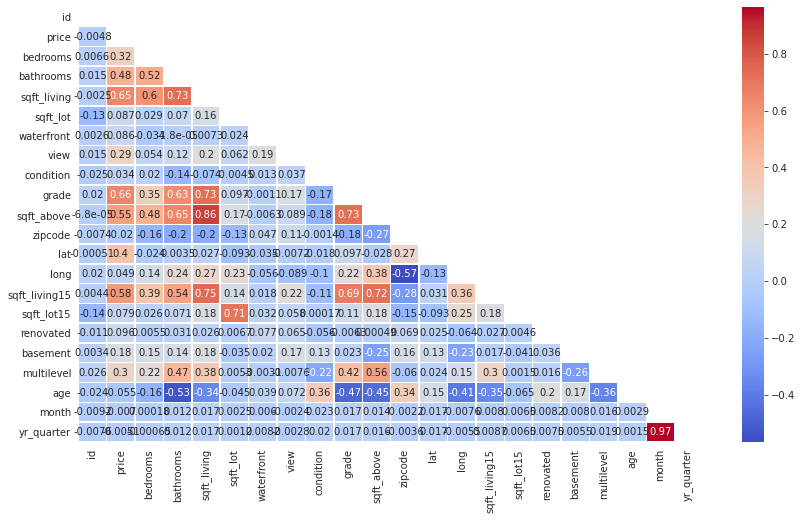

In [21]:
mask = np.zeros_like(df_no_y_outlrs.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_no_y_outlrs.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True)
print(df_no_y_outlrs.columns)

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'log_grade', 'log_sqft_living15', 'log_age',
       'log_sqft_above', 'log_sqft_lot15', 'waterfront', 'view', 'condition',
       'renovated', 'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin',
       'grade_bin', 'month', 'quadrant', 'nrth_sth', 'yr_quarter'],
      dtype='object')


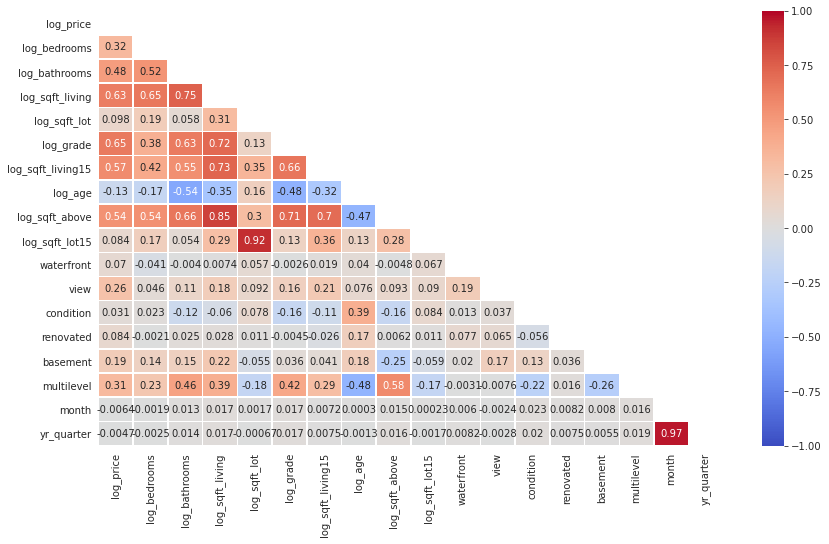

In [22]:
mask = np.zeros_like(df_log_w_cat.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_log_w_cat.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin=-1, vmax=1)
print(df_log_w_cat.columns)

- strong candidates: 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin'

       
- strong log candidates: 'log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 
    'grade_bin', 'age'


In [23]:
df_strong = df_no_y_outlrs[['price','bedrooms', 'bathrooms', 'sqft_living',
            'grade', 'sqft_living15', 'sqft_above', 'view','multilevel', 'basement', 'bedrooms_bin',
            'bathrooms_bin','quadrant','nrth_sth','grade_bin']]
df_log_strong = df_log_w_cat[['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'log_sqft_above','view','multilevel','nrth_sth','basement',  
    'bedrooms_bin','bathrooms_bin','grade_bin', 'quadrant']]

Show scatter matrix to see weak and strong candidates

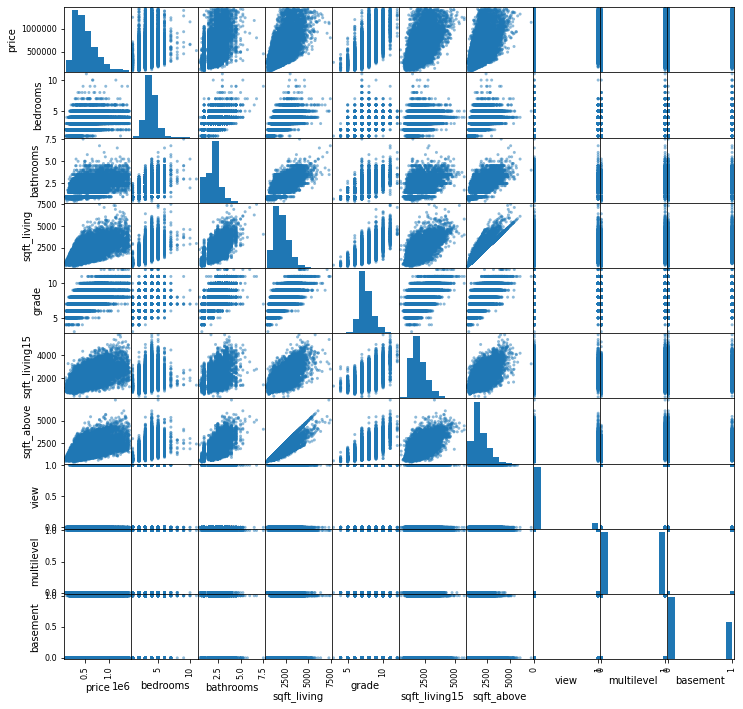

In [24]:
pd.plotting.scatter_matrix(df_strong, figsize=(12,12),
                           diagonal='hist'); # diagonal='kde' to view kde

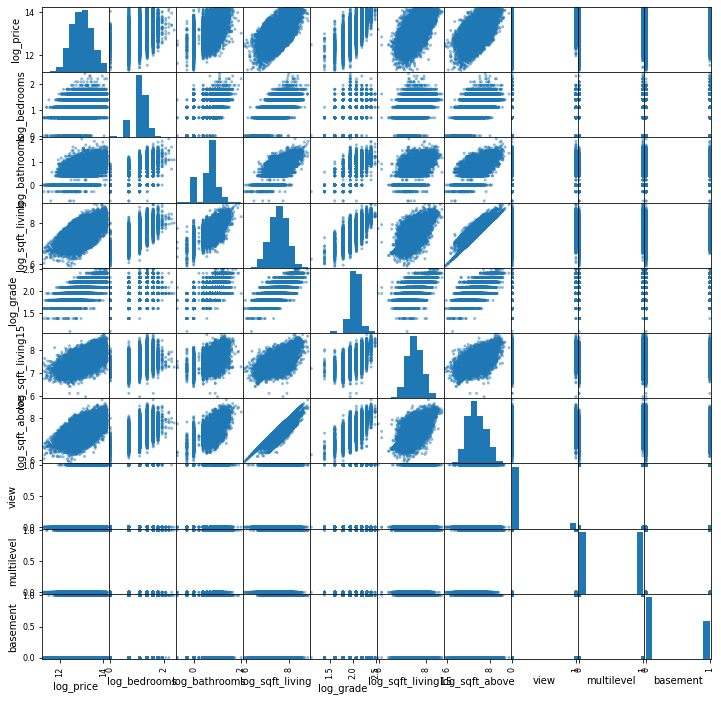

In [25]:
pd.plotting.scatter_matrix(df_log_strong, figsize=(12,12),
                           diagonal='hist'); # diagonal='kde' to view kde

Notes on the graphs above:
- Histograms (of features):
    - again, normality not required but worth keeping an eye on
    - grade looks about normally distributed
    - bedrooms and sqft_living are right skewed
    - transforming/scaling these may help later 
- Scatterplots:
    - show heteroscedasticity, but can be fixed with transformations
- recall sqft_living has multicollinearity with grade and bedrooms

## Simple Linear Regression Models with Continuous Variables

In [26]:
from statsmodels.formula.api import ols

In [27]:
for col in ['bedrooms', 'bathrooms', 'sqft_living',
            'grade', 'sqft_living15', 'sqft_above',]:
    f = 'price' + '~' + col
    print(col.upper())
    slr_model = ols(formula= f, data=df_strong).fit()
    display(slr_model.summary())
    
    y_hat = slr_model.predict(df_strong[col])
    residuals = y_hat - df_strong['price']
    mse = np.sum((residuals)**2)/len(df_strong['price'])
    print('MSE:', mse)
    print('RMSE Train:', np.sqrt(mse), '\n\n')

BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2353.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:23   Log-Likelihood:            -2.8674e+05
No. Observations:               20836   AIC:                         5.735e+05
Df Residuals:                   20834   BIC:                         5.735e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.102e+05   6174.397     34.042      0.000    1.98e+05    2.22e+05
bedrooms     8.64e+04   1781.262     48.507      0.000    8.29e+04    8.99e+04
==============================================================================
Omnibus:                     3364.317   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5680.614
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       4.394   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 52587627581.188034
RMSE Train: 229319.92408246614 


BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     6287.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:23   Log-Likelihood:            -2.8511e+05
No. Observations:               20836   AIC:                         5.702e+05
Df Residuals:                   20834   BIC:                         5.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.665e+05   4450.153     37.421      0.000    1.58e+05    1.75e+05
bathrooms   1.601e+05   2019.491     79.291      0.000    1.56e+05    1.64e+05
==============================================================================
Omnibus:                     3015.221   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4949.775
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       4.347   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 44959508356.82178
RMSE Train: 212036.57315855153 


SQFT_LIVING


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:23   Log-Likelihood:            -2.8212e+05
No. Observations:               20836   AIC:                         5.642e+05
Df Residuals:                   20834   BIC:                         5.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.11e+05   3390.042     32.743      0.000    1.04e+05    1.18e+05
sqft_living   192.4456      1.556    123.679      0.000     189.396     195.496
==============================================================================
Omnibus:                     2638.681   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4562.525
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       4.529   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 33748481056.553387
RMSE Train: 183707.5966217875 


GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:23   Log-Likelihood:            -2.8192e+05
No. Observations:               20836   AIC:                         5.639e+05
Df Residuals:                   20834   BIC:                         5.639e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.156e+05   8910.190    -69.087      0.000   -6.33e+05   -5.98e+05
grade       1.469e+05   1162.187    126.430      0.000    1.45e+05    1.49e+05
==============================================================================
Omnibus:                     2986.061   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5280.930
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       4.599   Cond. No.                         55.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 33117748964.330883
RMSE Train: 181982.82601479426 


SQFT_LIVING15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8349e+05
No. Observations:               20836   AIC:                         5.670e+05
Df Residuals:                   20834   BIC:                         5.670e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.063e+04   4339.034     16.279      0.000    6.21e+04    7.91e+04
sqft_living15   219.7593      2.111    104.104      0.000     215.622     223.897
==============================================================================
Omnibus:                     3714.956   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7410.298
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       4.965   Cond. No.                     6.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 38499598139.72739
RMSE Train: 196213.14466601718 


SQFT_ABOVE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     9184.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8405e+05
No. Observations:               20836   AIC:                         5.681e+05
Df Residuals:                   20834   BIC:                         5.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.92e+05   3500.411     54.849      0.000    1.85e+05    1.99e+05
sqft_above   176.6262      1.843     95.834      0.000     173.014     180.239
==============================================================================
Omnibus:                     3309.252   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5892.982
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.607   Cond. No.                     4.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 40620367179.6777
RMSE Train: 201544.950767013 




In [28]:
# log transformed variables
for col in ['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'log_sqft_above']:
    f = 'log_price' + '~' + col
    print(col.upper())
    slr_model2 = ols(formula= f, data=df_log_strong).fit()
    display(slr_model2.summary())
    
    y_hat = slr_model2.predict(df_log_strong[col])
    residuals = y_hat - df_log_strong['log_price']
    mse = np.sum((residuals)**2)/len(df_log_strong['log_price'])
    print('MSE:', mse)
    print('RMSE Train:', np.sqrt(mse), '\n\n')

LOG_BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2397.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -12677.
No. Observations:               20836   AIC:                         2.536e+04
Df Residuals:                   20834   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.3835      0.013    937.941      0.000      12.358      12.409
log_bedrooms     0.5365      0.011     48.960      0.000       0.515       0.558
==============================================================================
Omnibus:                      200.493   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.032
Skew:                          -0.012   Prob(JB):                     9.57e-29
Kurtosis:                       2.615   Cond. No.                         8.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.19770153213854855
RMSE Train: 0.44463640442337665 


LOG_BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     6222.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -11090.
No. Observations:               20836   AIC:                         2.218e+04
Df Residuals:                   20834   BIC:                         2.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.6231      0.006   2215.752      0.000      12.612      12.634
log_bathrooms     0.5857      0.007     78.880      0.000       0.571       0.600
==============================================================================
Omnibus:                      280.749   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.176
Skew:                           0.039   Prob(JB):                     1.11e-37
Kurtosis:                       2.564   Cond. No.                         3.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.16975200191441953
RMSE Train: 0.412009710946744 


LOG_SQFT_LIVING


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.376e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -8528.0
No. Observations:               20836   AIC:                         1.706e+04
Df Residuals:                   20834   BIC:                         1.708e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.5187      0.047    160.343      0.000       7.427       7.611
log_sqft_living     0.7295      0.006    117.319      0.000       0.717       0.742
==============================================================================
Omnibus:                      302.702   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.076
Skew:                          -0.032   Prob(JB):                     1.30e-39
Kurtosis:                       2.550   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.1327486294082531
RMSE Train: 0.36434685316090365 


LOG_GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -8136.1
No. Observations:               20836   AIC:                         1.628e+04
Df Residuals:                   20834   BIC:                         1.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6635      0.035    244.136      0.000       8.594       8.733
log_grade      2.1562      0.018    122.842      0.000       2.122       2.191
==============================================================================
Omnibus:                        7.815   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.577
Skew:                           0.030   Prob(JB):                       0.0226
Kurtosis:                       2.928   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.12784783911451883
RMSE Train: 0.3575581618625407 


LOG_SQFT_LIVING15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -9722.7
No. Observations:               20836   AIC:                         1.945e+04
Df Residuals:                   20834   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.6564      0.064    104.720      0.000       6.532       6.781
log_sqft_living15     0.8445      0.008    100.076      0.000       0.828       0.861
==============================================================================
Omnibus:                        3.324   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                3.255
Skew:                           0.014   Prob(JB):                        0.196
Kurtosis:                       2.945   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.14887988800895002
RMSE Train: 0.38584956655275643 


LOG_SQFT_ABOVE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     8399.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -10283.
No. Observations:               20836   AIC:                         2.057e+04
Df Residuals:                   20834   BIC:                         2.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.5011      0.049    172.441      0.000       8.404       8.598
log_sqft_above     0.6115      0.007     91.644      0.000       0.598       0.625
==============================================================================
Omnibus:                      307.118   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.300
Skew:                          -0.026   Prob(JB):                     7.05e-40
Kurtosis:                       2.547   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.15711229346145392
RMSE Train: 0.39637393135958615 




\> 1.5e6 : LOG_SQFT_LIVING15: r_2=.328/JB=4.191/skew=0.027/kurt=2.957/F-stat=10170

\> 1.5e6 : LOG_GRADE: r_2=.425/JB=8.792/skew=0.035/kurt=2.929/F-stat=15430

\> 1.45e6 : LOG_SQFT_LIVING15: r_2=.325/JB=3.255/skew=-0.014/kurt=2.945/F-stat=10020

\> 1.45e6 : LOG_GRADE: r_2=.420/JB=7.577/skew=0.030/kurt=2.928/F-stat=15090

\> 1.4e6 : LOG_SQFT_LIVING15: r_2=.322/JB=4.230/skew=-0.003/kurt=2.930/F-stat=9879

\> 1.4e6 : LOG_GRADE: r_2=.416/JB=7.01/skew=0.019/kurt=2.918/F-stat=14800

## Linear Regression Models with Categorical Variables

In [29]:
for col in ['view','quadrant','nrth_sth','nrth_sth','basement','multilevel','bedrooms_bin', 'bathrooms_bin', 'grade_bin']:
    df_cat_mod = pd.get_dummies(df_strong[col].astype('category'), drop_first=True, prefix=col)
    df_cat_mod = pd.concat([df_strong['price'], df_cat_mod], axis=1)
    f = 'price' + '~' + '+'.join(list(df_cat_mod.columns[1:]))
    print(col.upper())
    cat_model = ols(formula=f, data=df_cat_mod).fit()
    display(cat_model.summary())
    
    y_hat = cat_model.predict(df_cat_mod.iloc[:,1:])
    residuals = y_hat - df_cat_mod['price']
    mse = np.sum((residuals)**2)/len(df_cat_mod['price'])
    print('MSE:', mse)
    print('RMSE Train:', np.sqrt(mse), '\n\n')

VIEW


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1923.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8694e+05
No. Observations:               20836   AIC:                         5.739e+05
Df Residuals:                   20834   BIC:                         5.739e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.78e+05   1677.762    284.897      0.000    4.75e+05    4.81e+05
view_1      2.504e+05   5709.813     43.849      0.000    2.39e+05    2.62e+05
==============================================================================
Omnibus:                     3272.658   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5361.336
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       4.278   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 53581821091.02697
RMSE Train: 231477.47426267414 


QUADRANT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2171.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8502e+05
No. Observations:               20836   AIC:                         5.701e+05
Df Residuals:                   20832   BIC:                         5.701e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.205e+05   2812.893    220.591      0.000    6.15e+05    6.26e+05
quadrant_NW -7.296e+04   3612.715    -20.195      0.000      -8e+04   -6.59e+04
quadrant_SE -2.672e+05   4546.219    -58.778      0.000   -2.76e+05   -2.58e+05
quadrant_SW -3.144e+05   4758.621    -66.065      0.000   -3.24e+05   -3.05e+05
==============================================================================
Omnibus:                     4627.220   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10413.705
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       5.358   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 44585524529.46744
RMSE Train: 211152.84636837704 


NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5888.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8526e+05
No. Observations:               20836   AIC:                         5.705e+05
Df Residuals:                   20834   BIC:                         5.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.763e+05   1785.617    322.727      0.000    5.73e+05     5.8e+05
nrth_sth_S -2.449e+05   3191.330    -76.731      0.000   -2.51e+05   -2.39e+05
==============================================================================
Omnibus:                     4135.164   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8436.309
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       5.028   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 45631579337.99199
RMSE Train: 213615.4941430794 


NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5888.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8526e+05
No. Observations:               20836   AIC:                         5.705e+05
Df Residuals:                   20834   BIC:                         5.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.763e+05   1785.617    322.727      0.000    5.73e+05     5.8e+05
nrth_sth_S -2.449e+05   3191.330    -76.731      0.000   -2.51e+05   -2.39e+05
==============================================================================
Omnibus:                     4135.164   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8436.309
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       5.028   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 45631579337.99199
RMSE Train: 213615.4941430794 


BASEMENT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     670.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.89e-145
Time:                        20:47:24   Log-Likelihood:            -2.8753e+05
No. Observations:               20836   AIC:                         5.751e+05
Df Residuals:                   20834   BIC:                         5.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.663e+05   2092.372    222.853      0.000    4.62e+05     4.7e+05
basement_1  8.806e+04   3401.734     25.886      0.000    8.14e+04    9.47e+04
==============================================================================
Omnibus:                     3709.599   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6383.993
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       4.384   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 56703062372.029686
RMSE Train: 238124.0482858245 


MULTILEVEL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2000.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8690e+05
No. Observations:               20836   AIC:                         5.738e+05
Df Residuals:                   20834   BIC:                         5.738e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.282e+05   2261.223    189.367      0.000    4.24e+05    4.33e+05
multilevel_1  1.432e+05   3202.005     44.717      0.000    1.37e+05    1.49e+05
==============================================================================
Omnibus:                     3678.790   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6499.723
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       4.522   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 53401529954.81199
RMSE Train: 231087.7105231085 


BEDROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     852.4
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8665e+05
No. Observations:               20836   AIC:                         5.733e+05
Df Residuals:                   20832   BIC:                         5.733e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.453e+05   5494.549    117.446      0.000    6.35e+05    6.56e+05
bedrooms_bin_four    -6.627e+04   6175.007    -10.732      0.000   -7.84e+04   -5.42e+04
bedrooms_bin_one_two -2.519e+05   6931.496    -36.348      0.000   -2.66e+05   -2.38e+05
bedrooms_bin_three   -1.938e+05   5967.257    -32.479      0.000   -2.06e+05   -1.82e+05
==============================================================================
Omnibus:                     3316.989   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5570.499
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 52128243763.07167
RMSE Train: 228316.10491393652 


BATHROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     2618.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8552e+05
No. Observations:               20836   AIC:                         5.710e+05
Df Residuals:                   20833   BIC:                         5.711e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         4.077e+05   2139.151    190.570      0.000    4.03e+05    4.12e+05
bathrooms_bin_many                 3.05e+05   4316.048     70.676      0.000    2.97e+05    3.13e+05
bathrooms_bin_two_two_point_five  1.236e+05   3316.365     37.272      0.000    1.17e+05     1.3e+05
==============================================================================
Omnibus:                     3027.781   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4962.136
Skew:                           0.990   Prob(JB):                         0.00
Kurtosis:                       4.339   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 46773375991.137245
RMSE Train: 216271.5330114836 


GRADE_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     4905.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:            -2.8229e+05
No. Observations:               20836   AIC:                         5.646e+05
Df Residuals:                   20832   BIC:                         5.646e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 4.03e+05   1965.068    205.103      0.000    3.99e+05    4.07e+05
grade_bin_below_average -1.055e+05   4365.902    -24.164      0.000   -1.14e+05   -9.69e+04
grade_bin_good           1.342e+05   3093.164     43.376      0.000    1.28e+05     1.4e+05
grade_bin_great          3.919e+05   3629.883    107.975      0.000    3.85e+05    3.99e+05
==============================================================================
Omnibus:                     2872.856   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5154.185
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       4.638   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 34298922384.361694
RMSE Train: 185199.6824629073 




In [30]:
for col in ['view','quadrant','nrth_sth','basement','multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin']:
    df_cat_mod2 = pd.get_dummies(df_log_strong[col].astype('category'), drop_first=True, prefix=col)
    df_cat_mod2 = pd.concat([df_log_strong['log_price'], df_cat_mod2], axis=1)
    f = 'log_price' + '~' +  '+'.join(list(df_cat_mod2.columns[1:]))
    print(col.upper())
    cat_model2 = ols(formula=f, data=df_cat_mod2).fit()
    display(cat_model2.summary())
    
    y_hat = cat_model2.predict(df_cat_mod2.iloc[:,1:])
    residuals = y_hat - df_cat_mod2['log_price']
    mse = np.sum((residuals)**2)/len(df_cat_mod2['log_price'])
    print('MSE:', mse)
    print('RMSE Train:', np.sqrt(mse), '\n\n')

VIEW


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1520.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.05e-321
Time:                        20:47:24   Log-Likelihood:                -13078.
No. Observations:               20836   AIC:                         2.616e+04
Df Residuals:                   20834   BIC:                         2.618e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9744      0.003   3949.169      0.000      12.968      12.981
view_1         0.4359      0.011     38.990      0.000       0.414       0.458
==============================================================================
Omnibus:                       74.197   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.987
Skew:                          -0.037   Prob(JB):                     2.56e-13
Kurtosis:                       2.752   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.20545642845673248
RMSE Train: 0.45327301756968996 


QUADRANT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     3137.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -9928.2
No. Observations:               20836   AIC:                         1.986e+04
Df Residuals:                   20832   BIC:                         1.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.2744      0.005   2557.152      0.000      13.264      13.285
quadrant_NW    -0.1538      0.007    -23.062      0.000      -0.167      -0.141
quadrant_SE    -0.5600      0.008    -66.751      0.000      -0.576      -0.544
quadrant_SW    -0.7183      0.009    -81.797      0.000      -0.736      -0.701
==============================================================================
Omnibus:                      163.533   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.853
Skew:                           0.080   Prob(JB):                     1.36e-52
Kurtosis:                       3.500   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.15184610064899362
RMSE Train: 0.3896743520543707 


NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     8295.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -10321.
No. Observations:               20836   AIC:                         2.065e+04
Df Residuals:                   20834   BIC:                         2.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1812      0.003   3971.171      0.000      13.175      13.188
nrth_sth_S    -0.5403      0.006    -91.075      0.000      -0.552      -0.529
==============================================================================
Omnibus:                       78.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.771
Skew:                           0.000   Prob(JB):                     6.53e-24
Kurtosis:                       3.351   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.15767398403228153
RMSE Train: 0.397081835434815 


BASEMENT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     812.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          2.90e-175
Time:                        20:47:24   Log-Likelihood:                -13414.
No. Observations:               20836   AIC:                         2.683e+04
Df Residuals:                   20834   BIC:                         2.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9411      0.004   3197.314      0.000      12.933      12.949
basement_1     0.1875      0.007     28.497      0.000       0.175       0.200
==============================================================================
Omnibus:                      117.349   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.942
Skew:                           0.034   Prob(JB):                     3.59e-19
Kurtosis:                       2.695   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.2121777362039342
RMSE Train: 0.4606275460759313 


MULTILEVEL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2283.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -12729.
No. Observations:               20836   AIC:                         2.546e+04
Df Residuals:                   20834   BIC:                         2.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.8649      0.004   2949.611      0.000      12.856      12.873
multilevel_1     0.2951      0.006     47.781      0.000       0.283       0.307
==============================================================================
Omnibus:                       83.051   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.689
Skew:                           0.021   Prob(JB):                     2.44e-14
Kurtosis:                       2.735   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.19867714436951942
RMSE Train: 0.4457321441959503 


BEDROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     877.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -12573.
No. Observations:               20836   AIC:                         2.515e+04
Df Residuals:                   20832   BIC:                         2.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.2804      0.011   1247.362      0.000      13.259      13.301
bedrooms_bin_four       -0.1094      0.012     -9.142      0.000      -0.133      -0.086
bedrooms_bin_one_two    -0.4959      0.013    -36.919      0.000      -0.522      -0.470
bedrooms_bin_three      -0.3559      0.012    -30.779      0.000      -0.379      -0.333
==============================================================================
Omnibus:                      153.421   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.745
Skew:                          -0.024   Prob(JB):                     1.80e-23
Kurtosis:                       2.656   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.1957237429419568
RMSE Train: 0.4424067618628323 


BATHROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2558.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -11524.
No. Observations:               20836   AIC:                         2.305e+04
Df Residuals:                   20833   BIC:                         2.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           12.8238      0.004   3081.840      0.000      12.816      12.832
bathrooms_bin_many                   0.5697      0.008     67.862      0.000       0.553       0.586
bathrooms_bin_two_two_point_five     0.2782      0.006     43.124      0.000       0.266       0.291
==============================================================================
Omnibus:                      110.730   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.388
Skew:                          -0.007   Prob(JB):                     5.77e-18
Kurtosis:                       2.698   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.17698078170458012
RMSE Train: 0.4206908386268711 


GRADE_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4826.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:24   Log-Likelihood:                -8314.8
No. Observations:               20836   AIC:                         1.664e+04
Df Residuals:                   20832   BIC:                         1.667e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.8391      0.004   3355.243      0.000      12.832      12.847
grade_bin_below_average    -0.3130      0.009    -36.821      0.000      -0.330      -0.296
grade_bin_good              0.2919      0.006     48.463      0.000       0.280       0.304
grade_bin_great             0.6939      0.007     98.166      0.000       0.680       0.708
==============================================================================
Omnibus:                       11.857   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.748
Skew:                          -0.008   Prob(JB):                      0.00464
Kurtosis:                       2.890   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 0.13006008533764285
RMSE Train: 0.3606384412921657 




\> 1.45e6 : GRADE_BIN: r_2=.410/JB=10.748/skew=-0.008/kurt=2.890/F-stat=4826

<hr style="border:1px solid gray"> </hr>

## Model 1 (Initial/Baseline)

#### Feature Select

In [31]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'log_sqft_above', 'view',
       'multilevel', 'nrth_sth', 'basement', 'bedrooms_bin', 'bathrooms_bin',
       'grade_bin', 'quadrant'],
      dtype='object')

#### M1 categorical variables: one hot encode
- Leaving out grades and bedrooms since we binned these categorical variables

In [32]:
df_m1_cats = df_log_strong[['view', 'basement', 'multilevel',
       'bedrooms_bin', 'bathrooms_bin', 'grade_bin','nrth_sth']].astype('category')
df_m1_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   view           20836 non-null  category
 1   basement       20836 non-null  category
 2   multilevel     20836 non-null  category
 3   bedrooms_bin   20836 non-null  category
 4   bathrooms_bin  20836 non-null  category
 5   grade_bin      20836 non-null  category
 6   nrth_sth       20836 non-null  category
dtypes: category(7)
memory usage: 306.1 KB


In [33]:
df_m1_cats = pd.get_dummies(df_m1_cats, drop_first = True)
df_m1_cats.head()

,view_1,basement_1,multilevel_1,bedrooms_bin_four,bedrooms_bin_one_two,bedrooms_bin_three,bathrooms_bin_many,bathrooms_bin_two_two_point_five,grade_bin_below_average,grade_bin_good,grade_bin_great,nrth_sth_S
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0


#### Model 1 continuous variables
- Don't transform for this initial model

In [34]:
df_m1_conts = df_log_strong[['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15','log_sqft_above']]
df_m1_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_price          20836 non-null  float64
 1   log_bedrooms       20836 non-null  float64
 2   log_bathrooms      20836 non-null  float64
 3   log_sqft_living    20836 non-null  float64
 4   log_grade          20836 non-null  float64
 5   log_sqft_living15  20836 non-null  float64
 6   log_sqft_above     20836 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [35]:
df_m1 = pd.concat([df_m1_conts, df_m1_cats], axis = 1)
display(df_m1.head())

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_grade,log_sqft_living15,log_sqft_above,view_1,basement_1,multilevel_1,bedrooms_bin_four,bedrooms_bin_one_two,bedrooms_bin_three,bathrooms_bin_many,bathrooms_bin_two_two_point_five,grade_bin_below_average,grade_bin_good,grade_bin_great,nrth_sth_S
0,12.309982,1.098612,0.000000,7.073270,1.945910,7.200425,7.073270,0,0,0,0,0,1,0,0,0,0,0,0
1,13.195614,1.098612,0.810930,7.851661,1.945910,7.432484,7.682482,0,1,1,0,0,1,0,1,0,0,0,0
2,12.100712,0.693147,0.000000,6.646391,1.791759,7.908387,6.646391,0,0,0,0,1,0,0,0,1,0,0,0
3,13.311329,1.386294,1.098612,7.580700,1.945910,7.215240,6.956545,0,1,0,1,0,0,1,0,0,0,0,0
4,13.142166,1.098612,0.693147,7.426549,2.079442,7.495542,7.426549,0,0,0,0,0,1,0,0,0,1,0,0


In [36]:
df_y = df_m1['log_price'].to_frame()
X1_cols = df_m1.columns[1:]

#### Fit the model

In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.formula.api as smf

In [38]:
X1 = '+'.join(list(X1_cols))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model1 = ols(formula= f, data=df_m1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3059.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:28   Log-Likelihood:                -338.13
No. Observations:               20836   AIC:                             714.3
Df Residuals:                   20817   BIC:                             865.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6906      0.113     68.049      0.000       7.469       7.912
log_bedrooms                        -0.0233      0.025     -0.931      0.352      -0.072       0.026
log_bathrooms                       -0.0007      0.010     -0.068      0.946      -0.020       0.018
log_sqft_living                      0.3391      0.017     19.682      0.000       0.305       0.373
log_grade                            0.4864      0.050      9.778      0.000       0.389       0.584
log_sqft_living15                    0.1823      0.009     21.121      0.000       0.165       0.199
log_sqft_above                       0.0703      0.017      4.116      0.000       0.037       0.104
view_1                               0.1727      0.006     27.107      0.000       0.160       0.185
basement_1                           0.0527      0.007      7.433      0.000       0.039       0.067
multilevel_1                         0.0296      0.005      6.316      0.000       0.020       0.039
bedrooms_bin_four                    0.0067      0.009      0.707      0.480      -0.012       0.025
bedrooms_bin_one_two                 0.0416      0.026      1.599      0.110      -0.009       0.092
bedrooms_bin_three                   0.0015      0.015      0.099      0.921      -0.028       0.031
bathrooms_bin_many                  -0.0133      0.009     -1.555      0.120      -0.030       0.003
bathrooms_bin_two_two_point_five    -0.0584      0.006     -9.539      0.000      -0.070      -0.046
grade_bin_below_average             -0.0342      0.011     -3.231      0.001      -0.055      -0.013
grade_bin_good                       0.0530      0.008      6.735      0.000       0.038       0.068
grade_bin_great                      0.1290      0.015      8.485      0.000       0.099       0.159
nrth_sth_S                          -0.4680      0.004   -120.563      0.000      -0.476      -0.460
==============================================================================
Omnibus:                      380.044   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.366
Skew:                           0.033   Prob(JB):                    6.43e-172
Kurtosis:                       3.951   Cond. No.                         936.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One sample T-test's in the baseline model suggest these feature have at least "some" linear relationship with log_price:
- 'log_sqft_living', 'log_grade', 'log_sqft_living15', 'og_sqft_above', 'view_1', 'basement_1', 'multilevel_1', 'bathrooms_bin_two_two_point_five',  'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great'

One sample T-test's in the baseline model suggest these feature have at least "no" linear relationship with log_price:
- 'log_bathrooms', 'log_bedrooms', 'bedrooms_bin_four', 'bedrooms_bin_one_two', 'bedrooms_bin_three', 'bathrooms_bin_many'

#### MSE and RMSE

In [39]:
y_hat1 = model1.predict(df_m1.iloc[:,1:])
residuals = y_hat1 - df_m1['log_price']
mse = np.sum((residuals)**2)/len(df_m1['log_price'])
print('MSE:', mse)
print('RMSE Train:', np.sqrt(mse))

MSE: 0.060481331948406374
RMSE Train: 0.24592952638592702


#### Checking for multicollinearity
- Check VIF scores

In [40]:
vif_scores = [variance_inflation_factor(df_m1[X1_cols].values, i) for i in range(df_m1[X1_cols].shape[1])]
list(zip(X1_cols, vif_scores))

[('log_bedrooms', 291.0428324130642),
 ('log_bathrooms', 18.67960930765524),
 ('log_sqft_living', 5767.432168096169),
 ('log_grade', 1776.3358624555071),
 ('log_sqft_living15', 1339.298671694985),
 ('log_sqft_above', 5475.788517371252),
 ('view_1', 1.19808921258959),
 ('basement_1', 6.5333837788566),
 ('multilevel_1', 3.7812638967311094),
 ('bedrooms_bin_four', 9.086842221746263),
 ('bedrooms_bin_one_two', 29.2342250852733),
 ('bedrooms_bin_three', 33.5679681008653),
 ('bathrooms_bin_many', 4.035602489791811),
 ('bathrooms_bin_two_two_point_five', 4.506958846591661),
 ('grade_bin_below_average', 2.44412406250573),
 ('grade_bin_good', 3.5289730399966466),
 ('grade_bin_great', 5.854538663864813),
 ('nrth_sth_S', 1.6217901800967665)]

#### Checking for linearity
- Scatter matrix
- Joint plot

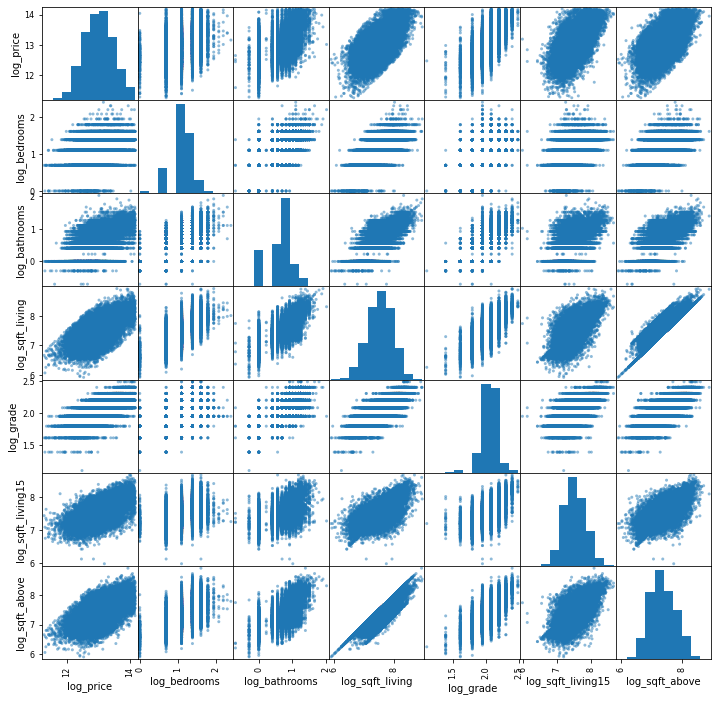

In [41]:
pd.plotting.scatter_matrix(df_m1_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Checking for normality
- QQ-Plot
- JB Test

<AxesSubplot:>

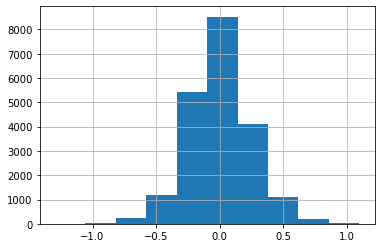

In [42]:
model1.resid.hist()

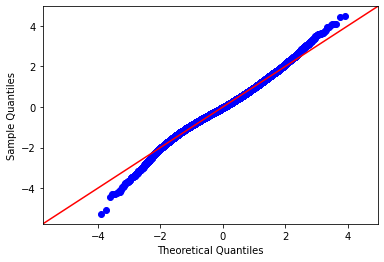

In [43]:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

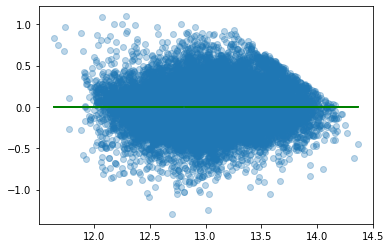

In [44]:
plt.scatter(model1.predict(df_m1[X1_cols]), model1.resid, alpha = .3)
plt.plot(model1.predict(df_m1[X1_cols]), [0 for i in range(len(df_m1[X1_cols]))], c='g')


In [45]:
# lwr_thresh = df_y.log_price.quantile(q=.45)
# upr_thresh = df_y.log_price.quantile(q=.55)
# middle_10percent_indices = df_y[(df_y.log_price >= lwr_thresh) & (df_y.log_price <=upr_thresh)].index
# # len(middle_10percent_indices)

# indices = [x-1 for x in df_y.index if x not in middle_10percent_indices]
# plt.scatter(df_y.log_price.iloc[indices], model1.resid.iloc[indices])
# plt.xlabel('log_price')
# plt.ylabel('Model Residuals')
# plt.title("Residuals versus log_price")
# plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
# plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [46]:
# middle_10percent_indices = df_y[(df_y.log_price >= lwr_thresh) & (df_y.log_price <=upr_thresh)].index
# indices = [x-1 for x in df_y.index if x not in middle_10percent_indices]

In [47]:
# import statsmodels.stats.api as sms
# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(model1.resid.iloc[indices], model1.model.exog[indices])
# list(zip(name, test))

<hr style="border:1px solid gray"> </hr>

## Model 2

#### Feature Select

In [48]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'log_sqft_above', 'view',
       'multilevel', 'nrth_sth', 'basement', 'bedrooms_bin', 'bathrooms_bin',
       'grade_bin', 'quadrant'],
      dtype='object')

#### M2 categorical variables: one hot encode
- Leaving out grades and bedrooms since we binned these categorical variables

In [49]:
df_m2_cats = df_log_strong[['view', 'grade_bin']].astype('category')
df_m2_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   view       20836 non-null  category
 1   grade_bin  20836 non-null  category
dtypes: category(2)
memory usage: 203.8 KB


In [50]:
df_m2_cats = pd.get_dummies(df_m2_cats, drop_first = True)
df_m2_cats.head()

,view_1,grade_bin_below_average,grade_bin_good,grade_bin_great
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,1,0


#### M2 continuous variables

In [51]:
df_m2_conts = df_log_strong[['log_price', 'log_sqft_living15']]
df_m2_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_price          20836 non-null  float64
 1   log_sqft_living15  20836 non-null  float64
dtypes: float64(2)
memory usage: 488.3 KB


In [52]:
df_m2 = pd.concat([df_m2_conts, df_m2_cats], axis = 1)
display(df_m2.head())

,log_price,log_sqft_living15,view_1,grade_bin_below_average,grade_bin_good,grade_bin_great
0,12.309982,7.200425,0,0,0,0
1,13.195614,7.432484,0,0,0,0
2,12.100712,7.908387,0,1,0,0
3,13.311329,7.215240,0,0,0,0
4,13.142166,7.495542,0,0,1,0


In [53]:
df_y = df_m2['log_price'].to_frame()
X2_cols = df_m2.columns[1:]

#### Fit the model

In [54]:
X2 = '+'.join(list(X2_cols))
y = list(df_y.columns)[0]
f2 = str(y) + '~' + X2

model2 = ols(formula= f2, data=df_m2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3632.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:35   Log-Likelihood:                -7280.4
No. Observations:               20836   AIC:                         1.457e+04
Df Residuals:                   20830   BIC:                         1.462e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.2283      0.075    137.027      0.000      10.082      10.375
log_sqft_living15           0.3513      0.010     34.849      0.000       0.332       0.371
view_1                      0.2240      0.009     25.797      0.000       0.207       0.241
grade_bin_below_average    -0.2431      0.008    -29.179      0.000      -0.259      -0.227
grade_bin_good              0.2075      0.006     34.111      0.000       0.196       0.219
grade_bin_great             0.4919      0.008     58.941      0.000       0.476       0.508
==============================================================================
Omnibus:                       35.779   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.974
Skew:                          -0.040   Prob(JB):                     1.88e-07
Kurtosis:                       2.829   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### MSE and RMSE

In [55]:
y_hat2 = model2.predict(df_m2.iloc[:,1:])
residuals = y_hat2 - df_m2['log_price']
mse = np.sum((residuals)**2)/len(df_m1['log_price'])
print('MSE:', mse)
print('RMSE Train:', np.sqrt(mse))

MSE: 0.11776737872573159
RMSE Train: 0.34317252035343915


#### Checking for multicollinearity
- Check VIF scores

In [56]:
vif_scores = [variance_inflation_factor(df_m2[X2_cols].values, i)
              for i in range(df_m2[X2_cols].shape[1])]
list(zip(X2_cols, vif_scores))

[('log_sqft_living15', 2.4572858991137627),
 ('view_1', 1.1301137719160552),
 ('grade_bin_below_average', 1.2401564546557127),
 ('grade_bin_good', 1.723552615799117),
 ('grade_bin_great', 1.5052275924400784)]

#### Checking for linearity
- Scatter matrix
- Joint plot

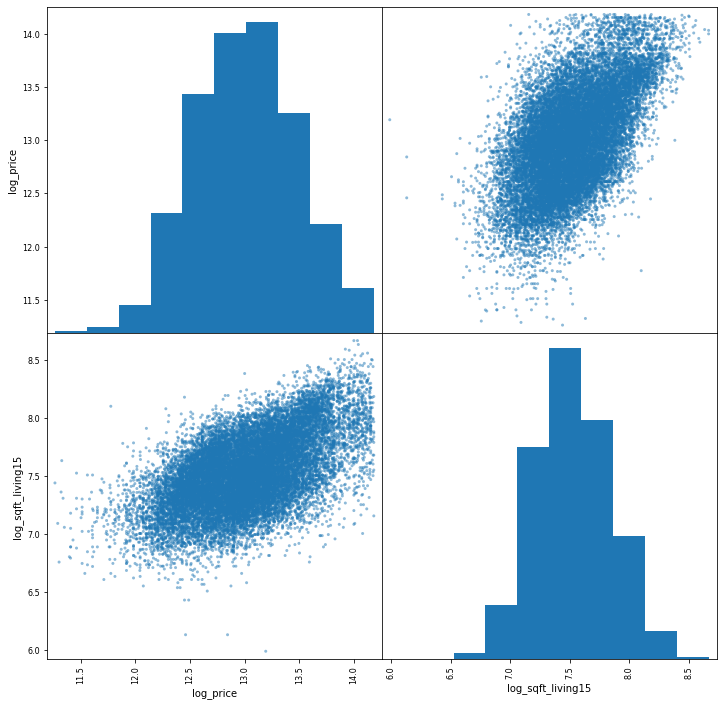

In [57]:
pd.plotting.scatter_matrix(df_m2_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Checking for normality
- QQ-Plot
- JB Test

<AxesSubplot:>

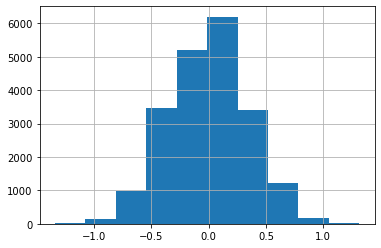

In [58]:
model2.resid.hist()

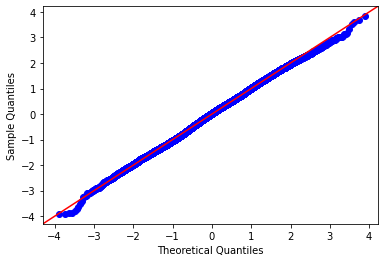

In [59]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

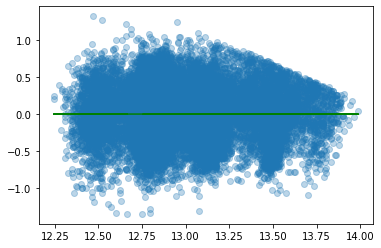

In [60]:
plt.scatter(model2.predict(df_m2[X2_cols]), model2.resid, alpha = .3)
plt.plot(model2.predict(df_m2[X2_cols]), [0 for i in range(len(df_m2[X2_cols]))], c='g')


<hr style="border:1px solid gray"> </hr>

## Model 3

#### Feature Select

In [61]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'log_sqft_above', 'view',
       'multilevel', 'nrth_sth', 'basement', 'bedrooms_bin', 'bathrooms_bin',
       'grade_bin', 'quadrant'],
      dtype='object')

In [62]:
df_m1.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'log_sqft_above', 'view_1',
       'basement_1', 'multilevel_1', 'bedrooms_bin_four',
       'bedrooms_bin_one_two', 'bedrooms_bin_three', 'bathrooms_bin_many',
       'bathrooms_bin_two_two_point_five', 'grade_bin_below_average',
       'grade_bin_good', 'grade_bin_great', 'nrth_sth_S'],
      dtype='object')

Insert variables with p values $\approx$ 0
- 'log_sqft_living', 'log_grade', 'log_sqft_living15', 'log_sqft_above', 'view_1', 'basement_1', 'multilevel_1', 'bathrooms_bin_two_two_point_five',  'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great'

#### M3 categorical variables: one hot encode

In [63]:
df_m3_cats = df_log_strong[['view','multilevel','bathrooms_bin','basement','grade_bin','nrth_sth']].astype('category')

In [64]:
df_m3_cats = pd.get_dummies(df_m3_cats, drop_first = True)
df_m3_cats.head()

,view_1,multilevel_1,bathrooms_bin_many,bathrooms_bin_two_two_point_five,basement_1,grade_bin_below_average,grade_bin_good,grade_bin_great,nrth_sth_S
0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0


#### M3 continuous variables

In [65]:
df_m3_conts = df_log_strong[['log_price', 'log_sqft_above']]
df_m3_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_price       20836 non-null  float64
 1   log_sqft_above  20836 non-null  float64
dtypes: float64(2)
memory usage: 488.3 KB


In [66]:
df_m3 = pd.concat([df_m3_conts, df_m3_cats], axis = 1).drop(['bathrooms_bin_many'], axis=1)
display(df_m3.head())

,log_price,log_sqft_above,view_1,multilevel_1,bathrooms_bin_two_two_point_five,basement_1,grade_bin_below_average,grade_bin_good,grade_bin_great,nrth_sth_S
0,12.309982,7.073270,0,0,0,0,0,0,0,0
1,13.195614,7.682482,0,1,1,1,0,0,0,0
2,12.100712,6.646391,0,0,0,0,1,0,0,0
3,13.311329,6.956545,0,0,0,1,0,0,0,0
4,13.142166,7.426549,0,0,0,0,0,1,0,0


Rename the columns for the formula, so they don't contain numbers.

In [67]:
df_m3.columns

Index(['log_price', 'log_sqft_above', 'view_1', 'multilevel_1',
       'bathrooms_bin_two_two_point_five', 'basement_1',
       'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great',
       'nrth_sth_S'],
      dtype='object')

In [68]:
df_m3.columns[1:]

Index(['log_sqft_above', 'view_1', 'multilevel_1',
       'bathrooms_bin_two_two_point_five', 'basement_1',
       'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great',
       'nrth_sth_S'],
      dtype='object')

In [69]:
df_y = df_m3['log_price'].to_frame()
X3_cols = df_m3.columns[1:]

#### Fit the model

In [70]:
X3 = '+'.join(list(X3_cols))
y = list(df_y.columns)[0]
f3 = str(y) + '~' + X3

model3 = ols(formula= f3, data=df_m3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     5662.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:47:36   Log-Likelihood:                -919.97
No. Observations:               20836   AIC:                             1860.
Df Residuals:                   20826   BIC:                             1939.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            9.5671      0.051    189.031      0.000       9.468       9.666
log_sqft_above                       0.4676      0.007     66.271      0.000       0.454       0.481
view_1                               0.2026      0.006     31.344      0.000       0.190       0.215
multilevel_1                        -0.0127      0.005     -2.827      0.005      -0.022      -0.004
bathrooms_bin_two_two_point_five    -0.0421      0.004    -10.155      0.000      -0.050      -0.034
basement_1                           0.1837      0.004     45.137      0.000       0.176       0.192
grade_bin_below_average             -0.1258      0.006    -19.486      0.000      -0.138      -0.113
grade_bin_good                       0.1320      0.005     27.747      0.000       0.123       0.141
grade_bin_great                      0.3110      0.007     46.113      0.000       0.298       0.324
nrth_sth_S                          -0.4774      0.004   -120.776      0.000      -0.485      -0.470
==============================================================================
Omnibus:                      374.553   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              771.844
Skew:                           0.033   Prob(JB):                    2.49e-168
Kurtosis:                       3.941   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### MSE and RMSE

In [71]:
y_hat3 = model3.predict(df_m3.iloc[:,1:])
residuals = y_hat3 - df_m3['log_price']
mse = np.sum((residuals)**2)/len(df_m3['log_price'])
print('MSE:', mse)
print('RMSE Train:', np.sqrt(mse))

MSE: 0.06395524696053248
RMSE Train: 0.252893746384786


#### Checking for multicollinearity
- Check VIF scores

In [72]:
X3_cols.values

array(['log_sqft_above', 'view_1', 'multilevel_1',
       'bathrooms_bin_two_two_point_five', 'basement_1',
       'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great',
       'nrth_sth_S'], dtype=object)

In [73]:
vif_scores = [variance_inflation_factor(df_m3[X3_cols].values, i)
              for i in range(df_m3[X3_cols].shape[1])]
list(zip(X3_cols, vif_scores))

[('log_sqft_above', 5.657679469821945),
 ('view_1', 1.1720283535980733),
 ('multilevel_1', 2.9795018141374694),
 ('bathrooms_bin_two_two_point_five', 1.9549486042364324),
 ('basement_1', 1.8576629203791954),
 ('grade_bin_below_average', 1.296429591553816),
 ('grade_bin_good', 1.9478174859761452),
 ('grade_bin_great', 1.7959101669799113),
 ('nrth_sth_S', 1.5650085047172961)]

#### Checking for linearity
- Scatter matrix
- Joint plot

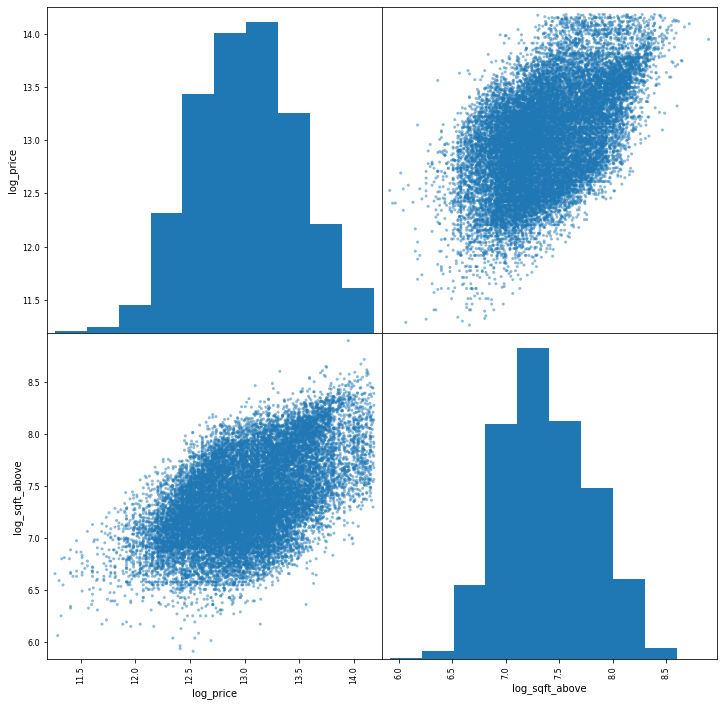

In [74]:
pd.plotting.scatter_matrix(df_m3_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Checking for normality
- QQ-Plot
- JB Test

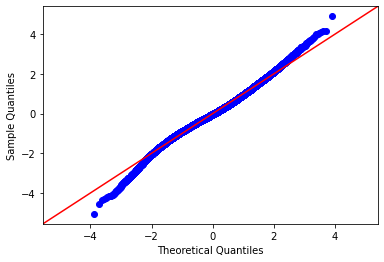

In [75]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

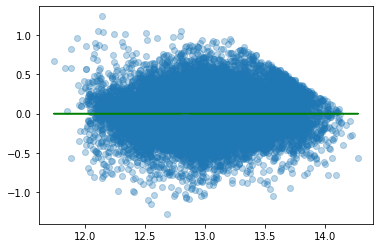

In [76]:
plt.scatter(model3.predict(df_m3[X3_cols]), model3.resid, alpha = .3)
plt.plot(model3.predict(df_m3[X3_cols]), [0 for i in range(len(df_m3[X3_cols]))], c='g')


<hr style="border:1px solid gray"> </hr>

## Interpret Results

#### Conclusion
- Features that are most correlated with price:
    - sqft_living, grade, sqft_living15, bathrooms
- Features we know have no linear relationship with price:
    - condition, date/month/quarter sold, sqft_lot, sqft_lot15
- Best model (highest $R^2$ with all p-values, **P > |t|**, <= .05) suggests:
    - sqft_living, grade, and 47.5° N all have a strong relationship with price
- Most trusted model (meets its assumptions) suggests:
    - sqft_living15 and grade have some linear relationship with price

#### Next Steps
- Focus on smaller subsets of houses (smaller price range, age range etc.)
- Use advanced feature selection/engineering techniques to produce a better linear regression model that both meets its assumptions and explains variation in price
    - more feature reduction to key in on specific houses
    - still plenty of data
- Develop a ML model to accurately predict house prices
- More EDA on the features